<a href="https://colab.research.google.com/github/daothihuyen64/Image_Retrieval/blob/feature%2FImage_Retrieval/Traditional_Image_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Get data

In [1]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=d8bfac76-f773-4980-96c8-2b23d5dbbd06
To: /content/data.zip
100% 76.1M/76.1M [00:03<00:00, 21.9MB/s]


In [2]:
!unzip data

Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/test/
   creating: data/test/American_egret/
  inflating: data/test/American_egret/n02009912_2473.JPEG  
   creating: data/test/Doberman/
  inflating: data/test/Doberman/n02107142_52285.JPEG  
   creating: data/test/Rhodesian_ridgeback/
  inflating: data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: data/test/African_crocodile/
  inflating: data/test/African_crocodile/n01697457_18534.JPEG  
   creating: data/test/Lakeland_terrier/
  inflating: data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: data/test/ambulance/
  inflating: data/test/ambulance/n02701002_2311.JPEG  
   creating: data/test/apiary/
  inflating: data/test/apiary/n02727426_4398.JPEG  
   creating: data/test/bannister/
  inflating: data/test/bannister/n02788148_47071.JPEG  
   creating: data/test/basketball/
  inflating: data/test/basketball/n02802426_12693.JPEG  
   creating: data/test/barn_spider/
  in

In [13]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
ROOT = 'data'
class_name = sorted(os.listdir(f'{ROOT}/train'))
print(class_name)

['African_crocodile', 'American_egret', 'Doberman', 'Lakeland_terrier', 'Orange_easy', 'Rhodesian_ridgeback', 'ambulance', 'apiary', 'bannister', 'barn_spider', 'basketball', 'black_widow', 'brain_coral', 'bullet_train', 'can_opener', 'capuchin', 'car_mirror', 'carousel', 'castle', 'china_cabinet', 'cliff_dwelling', 'comic_book', 'conch', 'cornet', 'dugong', 'electric_locomotive', 'flamingo', 'flatworm', 'goldfish', 'grocery_store', 'guillotine', 'half_track', 'hen-of-the-woods', 'horizontal_bar', 'killer_whale', 'kit_fox', 'knee_pad', 'lion', 'loudspeaker', 'lynx', 'magpie', 'meat_loaf', 'mixing_bowl', 'parachute', 'pizza', 'ram', 'red-backed_sandpiper', 'ruffed_grouse', 'safety_pin', 'scabbard', 'screen', 'steam_locomotive', 'steel_arch_bridge', 'theater_curtain', 'traffic_light', 'triceratops', 'vine_snake', 'warplane', 'white_stork', 'yawl']


In [73]:
def read_image_from_path(path,size):
  im = Image.open(path).convert('RGB')
  im = im.resize(size)
  return np.array(im)


In [75]:
def folder_to_images(folder, size):
  list_path = [folder + '/' + name for name in os.listdir(folder)]
  img_np = np.zeros(shape = (len(list_path), *size, 3))
  img_path = []
  for i, path in enumerate(list_path):
    img_np[i] = read_image_from_path(path, size)
    img_path.append(path)
  img_path = np.array(img_path)
  return img_np, list_path


In [79]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

#2. Absolute Difference

In [7]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

In [47]:
def get_l1_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in class_name:
        path = root_img_path + '/'+ folder
        image_np, image_path = folder_to_images(path, size)
        score = absolute_difference(query, image_np)
        ls_path_score.extend(list(zip(image_path, score)))
  return query,ls_path_score

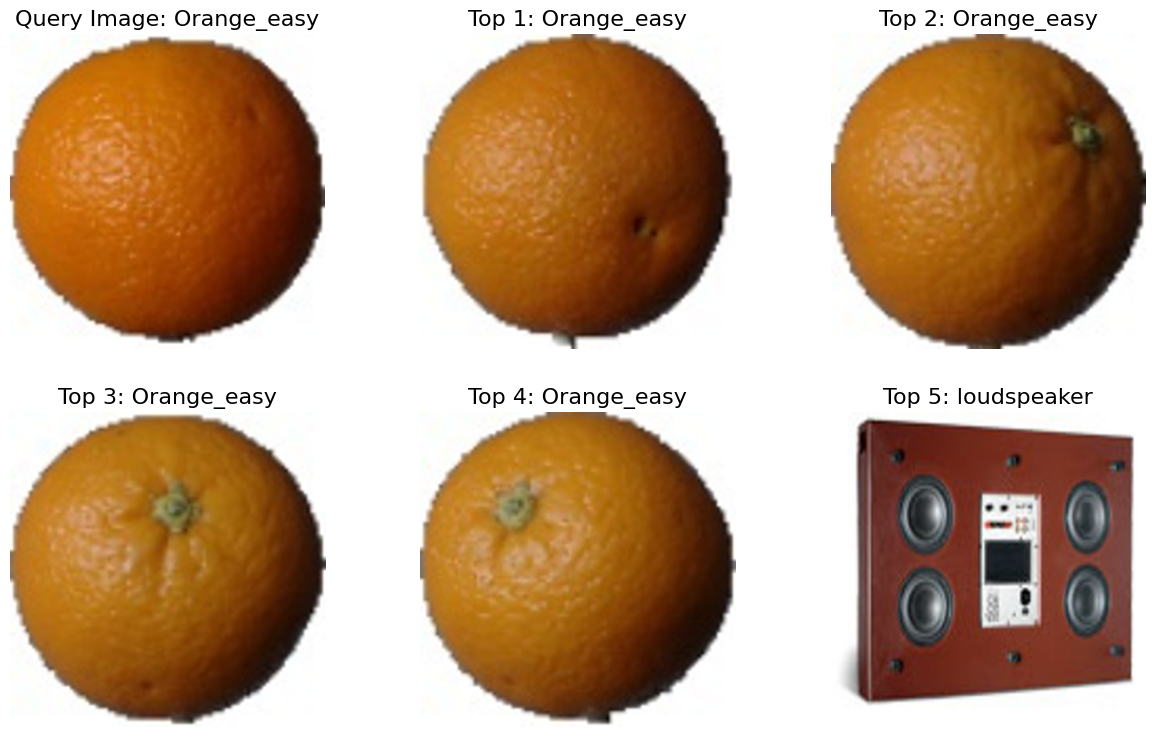

In [81]:
root_img_path = f'{ROOT}/train'
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448,448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [83]:
ls_path_score

[('data/train/ruffed_grouse/n01797886_6758.JPEG', 45471526.0),
 ('data/train/ruffed_grouse/n01797886_13537.JPEG', 45225240.0),
 ('data/train/ruffed_grouse/n01797886_55.JPEG', 72628491.0),
 ('data/train/ruffed_grouse/n01797886_6856.JPEG', 55568765.0),
 ('data/train/ruffed_grouse/n01797886_13048.JPEG', 46651392.0),
 ('data/train/ruffed_grouse/n01797886_17360.JPEG', 53513551.0),
 ('data/train/ruffed_grouse/n01797886_10810.JPEG', 45873647.0),
 ('data/train/ruffed_grouse/n01797886_20346.JPEG', 50273439.0),
 ('data/train/ruffed_grouse/n01797886_5207.JPEG', 47815299.0),
 ('data/train/ruffed_grouse/n01797886_17531.JPEG', 51641965.0),
 ('data/train/carousel/n02966193_575.JPEG', 66367037.0),
 ('data/train/carousel/n02966193_3789.JPEG', 58516109.0),
 ('data/train/carousel/n02966193_41665.JPEG', 45457539.0),
 ('data/train/carousel/n02966193_25350.JPEG', 58515645.0),
 ('data/train/carousel/n02966193_7683.JPEG', 50541083.0),
 ('data/train/carousel/n02966193_38636.JPEG', 59863289.0),
 ('data/train/ca

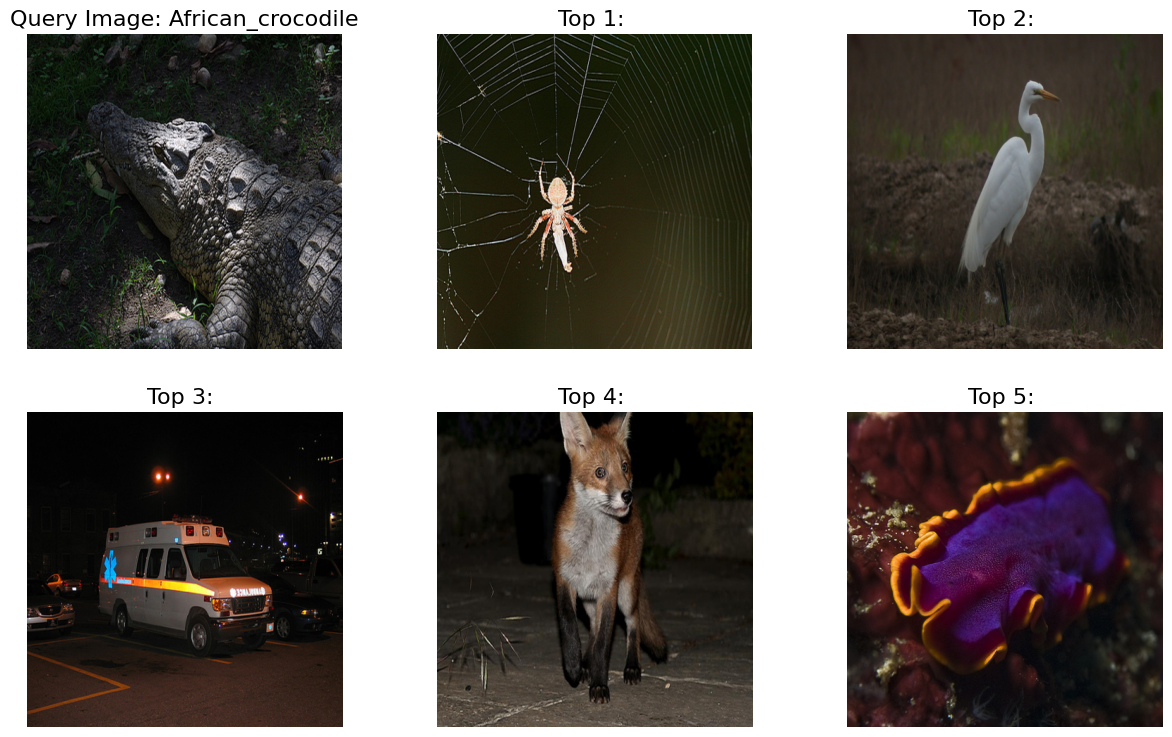

In [84]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# 3. Mean Square Difference

In [89]:
def mean_square_difference(query, data):
    square_diff = (data - query)**2
    axis_batch_size = tuple(range(1,len(data.shape)))
    sum_square_diff = np.sum(square_diff, axis=axis_batch_size)
    return np.sqrt(sum_square_diff)


In [108]:
def get_l2_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in class_name:
        path = root_img_path + '/'+ folder
        image_np, image_path = folder_to_images(path, size)
        score = mean_square_difference(query, image_np)
        ls_path_score.extend(list(zip(image_path, score)))
  return query,ls_path_score

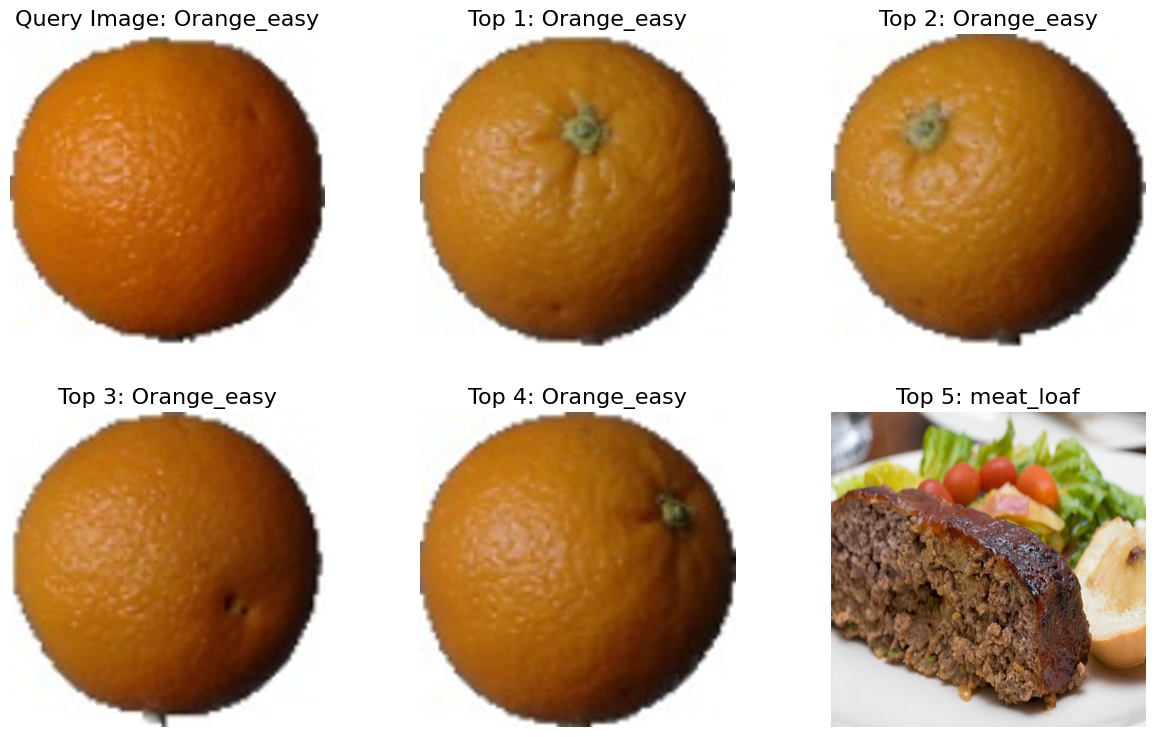

In [109]:
root_img_path = f'{ROOT}/train'
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448,448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

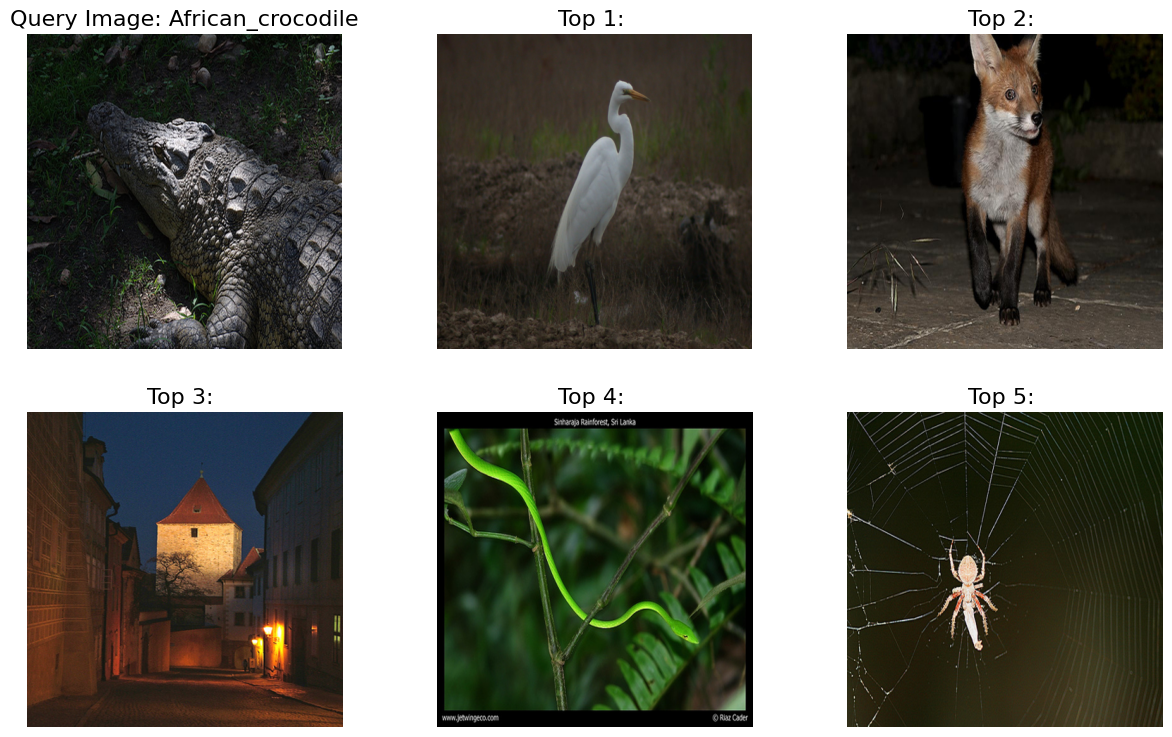

In [92]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [93]:
ls_path_score

[('data/train//ruffed_grouse/n01797886_6758.JPEG', 78150.87344361546),
 ('data/train//ruffed_grouse/n01797886_13537.JPEG', 60745.363312766516),
 ('data/train//ruffed_grouse/n01797886_55.JPEG', 130878.63929992549),
 ('data/train//ruffed_grouse/n01797886_6856.JPEG', 86013.73068876853),
 ('data/train//ruffed_grouse/n01797886_13048.JPEG', 80600.27470176513),
 ('data/train//ruffed_grouse/n01797886_17360.JPEG', 65350.54349429697),
 ('data/train//ruffed_grouse/n01797886_10810.JPEG', 88063.87555064789),
 ('data/train//ruffed_grouse/n01797886_20346.JPEG', 104341.37660103972),
 ('data/train//ruffed_grouse/n01797886_5207.JPEG', 72310.40629812558),
 ('data/train//ruffed_grouse/n01797886_17531.JPEG', 79468.64894409619),
 ('data/train//carousel/n02966193_575.JPEG', 71007.05472697766),
 ('data/train//carousel/n02966193_3789.JPEG', 67703.11454431029),
 ('data/train//carousel/n02966193_41665.JPEG', 82298.96568608866),
 ('data/train//carousel/n02966193_25350.JPEG', 74902.82669565949),
 ('data/train//car

# 4. Cosine Similarity

In [113]:
def cosine_similarity(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  query_norm = np.sqrt(np.sum(query**2))
  data_norm = np.sqrt(np.sum(data**2, axis= axis_batch_size))
  return np.sum(query*data, axis=axis_batch_size) / ((query_norm*data_norm) + np.finfo(float).eps)

In [114]:
def get_cosine_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in class_name:
        path = root_img_path + '/'+ folder
        image_np, image_path = folder_to_images(path, size)
        score = cosine_similarity(query, image_np)
        ls_path_score.extend(list(zip(image_path, score)))
  return query,ls_path_score

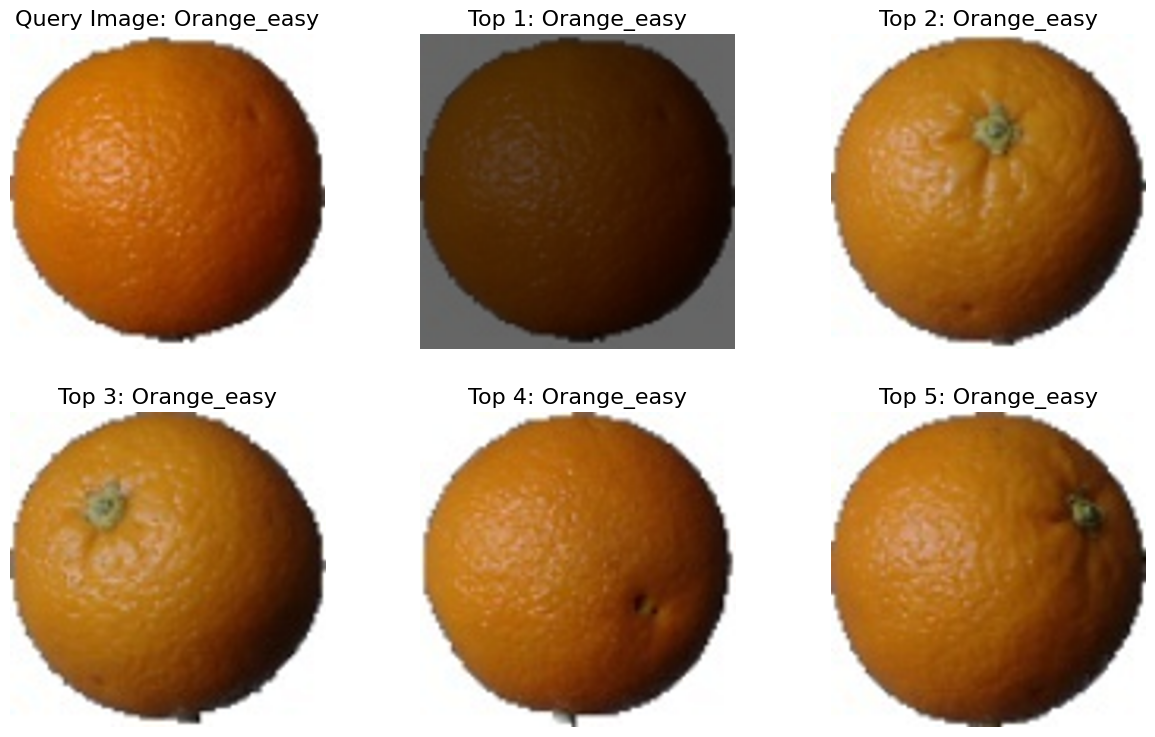

In [115]:
root_img_path = f'{ROOT}/train'
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448,448)
query, ls_path_score = get_cosine_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

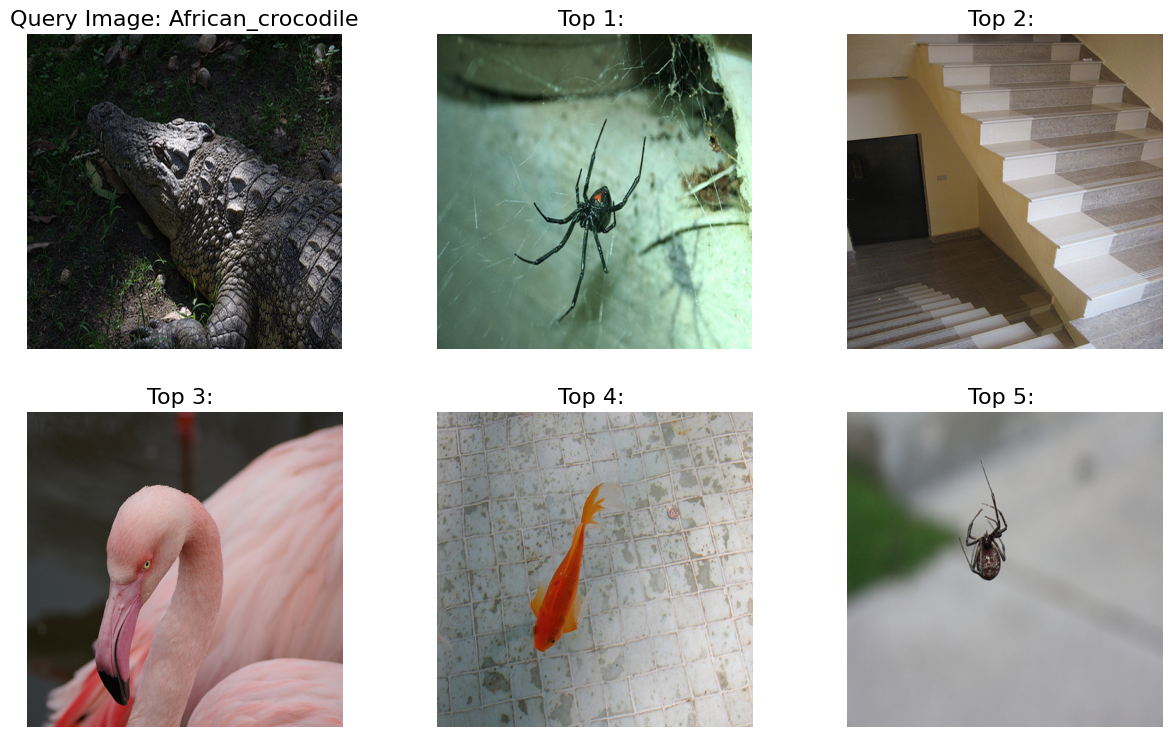

In [117]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [118]:
ls_path_score

[('data/train//ruffed_grouse/n01797886_6758.JPEG', 3.803459529774288),
 ('data/train//ruffed_grouse/n01797886_13537.JPEG', 3.6865253372846936),
 ('data/train//ruffed_grouse/n01797886_55.JPEG', 3.7981759778459168),
 ('data/train//ruffed_grouse/n01797886_6856.JPEG', 3.4578343725686103),
 ('data/train//ruffed_grouse/n01797886_13048.JPEG', 3.907492030636344),
 ('data/train//ruffed_grouse/n01797886_17360.JPEG', 3.2174064834954392),
 ('data/train//ruffed_grouse/n01797886_10810.JPEG', 3.6820507482158606),
 ('data/train//ruffed_grouse/n01797886_20346.JPEG', 3.4972187591420822),
 ('data/train//ruffed_grouse/n01797886_5207.JPEG', 3.843537248996728),
 ('data/train//ruffed_grouse/n01797886_17531.JPEG', 3.4114381867314147),
 ('data/train//carousel/n02966193_575.JPEG', 3.8322803340747273),
 ('data/train//carousel/n02966193_3789.JPEG', 3.4096257512664234),
 ('data/train//carousel/n02966193_41665.JPEG', 2.976112864843505),
 ('data/train//carousel/n02966193_25350.JPEG', 3.5884139905010857),
 ('data/tra

# 5. Correlation Coefficient

In [124]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [125]:
def get_correlation_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in class_name:
        path = root_img_path + '/'+ folder
        image_np, image_path = folder_to_images(path, size)
        score = correlation_coefficient(query, image_np)
        ls_path_score.extend(list(zip(image_path, score)))
  return query,ls_path_score

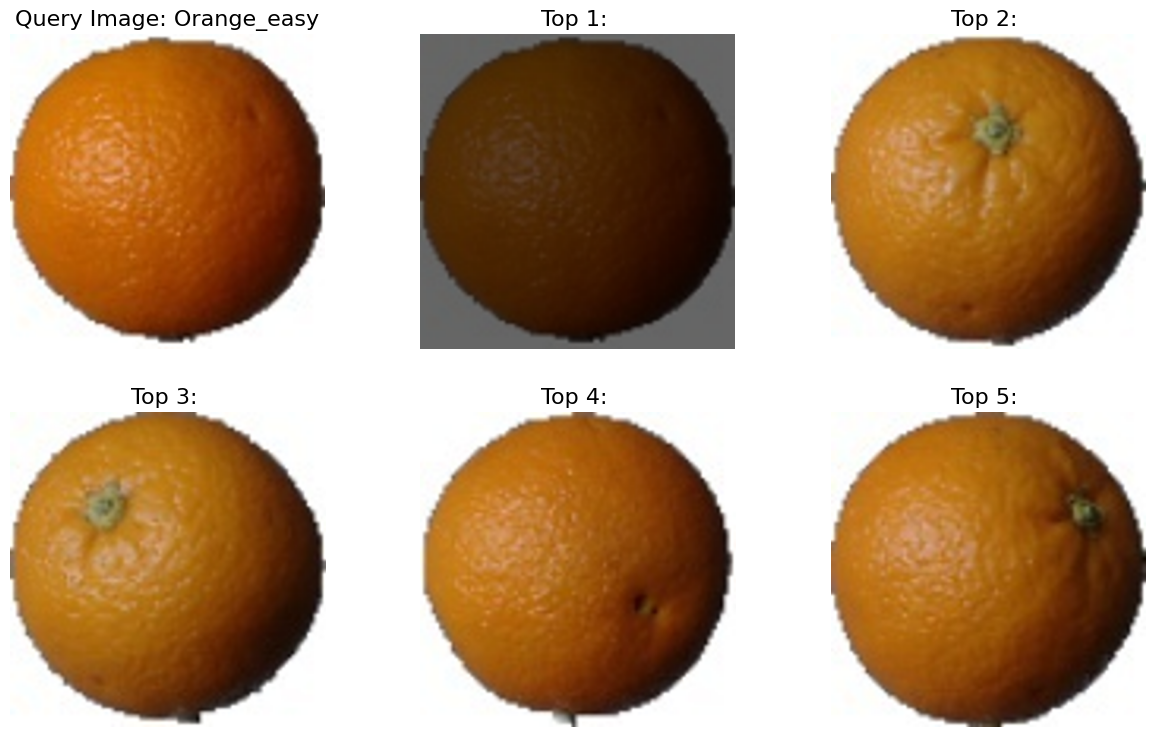

In [127]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

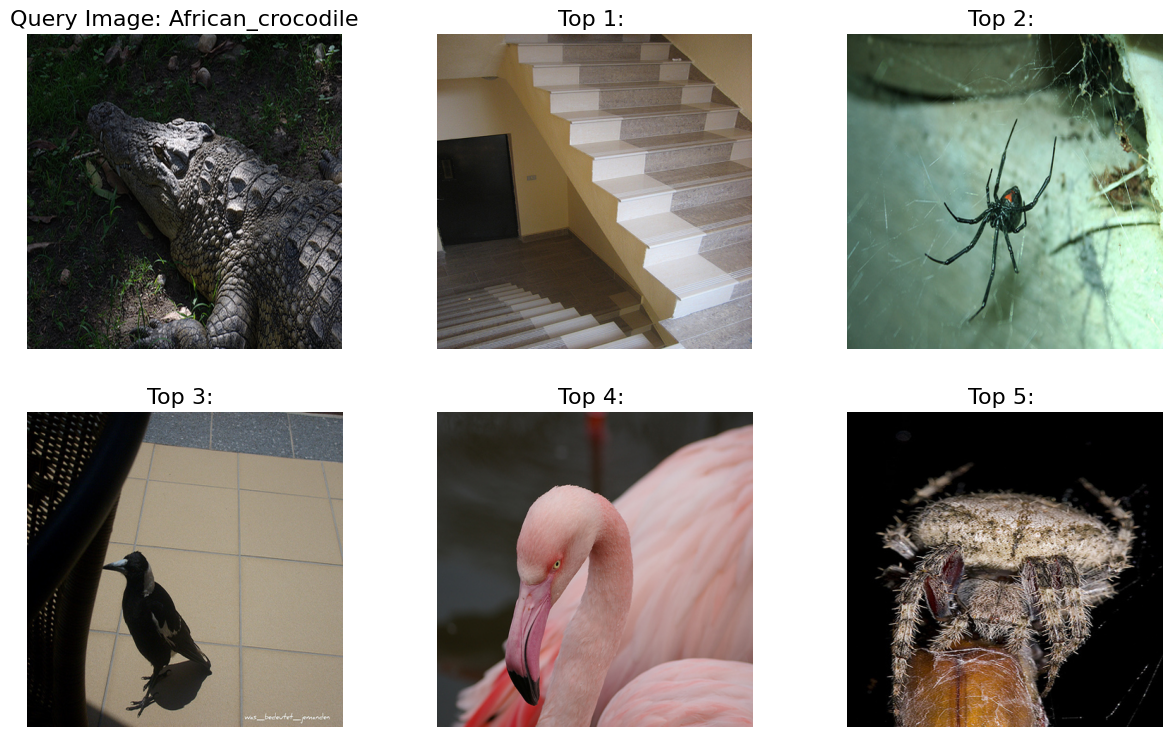

In [129]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [130]:
ls_path_score

[('data/train//ruffed_grouse/n01797886_6758.JPEG', 0.013476929432345418),
 ('data/train//ruffed_grouse/n01797886_13537.JPEG', 0.06627644593016434),
 ('data/train//ruffed_grouse/n01797886_55.JPEG', -0.04596490692043151),
 ('data/train//ruffed_grouse/n01797886_6856.JPEG', 0.0609877002548506),
 ('data/train//ruffed_grouse/n01797886_13048.JPEG', 0.07962630717462905),
 ('data/train//ruffed_grouse/n01797886_17360.JPEG', -0.04544377532419928),
 ('data/train//ruffed_grouse/n01797886_10810.JPEG', -0.09066433227011013),
 ('data/train//ruffed_grouse/n01797886_20346.JPEG', -0.18753950359201207),
 ('data/train//ruffed_grouse/n01797886_5207.JPEG', 0.09045295810523339),
 ('data/train//ruffed_grouse/n01797886_17531.JPEG', -0.1460262202305924),
 ('data/train//carousel/n02966193_575.JPEG', 0.27380883110158966),
 ('data/train//carousel/n02966193_3789.JPEG', 0.09104551978249989),
 ('data/train//carousel/n02966193_41665.JPEG', -0.156053737747181),
 ('data/train//carousel/n02966193_25350.JPEG', 0.0485102587